In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random


# 1. Hypersphere
$n$차원에서의 구를 초구(hypershpere)라고 한다. 반지름이 $r$인 2차권 구의 부피(면적)은 $S_2=\pi r^2$, 3차원은 $S_3=\frac{4}{3} \pi r^3$이다. 이를 확장하여 4차원, 5차원 구의 부피를 몬테카를로 방법을 이용하여 추측해보자.

$n$차원 구의 부피는 $S_n = C_n r^n$이다.<br>
따라서 반지름이 1인 구를 생각하면 $S_n=C_n$과 같다.<br>
몬테카를로 방법을 이용한 2차원 원의 면적 문제를 응용하여 3, 4, 5차원에서 $C_n$의 근사값을 구하여라.

In [3]:
#test 2-D circle
def C2(n):
    count = 0
    for i in range(n) :
        x,y = random.random(), random.random()
        if x*x+y*y < 1 :
            count += 1
    return 4*count/n # 2차원의 경우 원을 둘러싸는 사각형의 넓이가 4이므로 4를 곱함
C2(100000), np.pi #이론값

(3.14368, 3.141592653589793)

In [4]:
def C3(n):
    count = 0
    for i in range(n) :
        x,y,z = random.random(),random.random(),random.random()
        if x*x+y*y+z*z < 1 :
            count += 1
    return 8*count/n #3차원의 경우 구를 둘러싸는 육면체의 부피가 8이므로 8을 곱함
C3(100000), 4/3*np.pi #이론값

(4.17408, 4.1887902047863905)

In [5]:
def C4(n):
    count = 0
    for i in range(n) :
        x,y,z,w = random.random(),random.random(),random.random(),random.random()
        if x*x+y*y+z*z+w*w < 1 :
            count += 1
    return 16*count/n 
C4(1000000), np.pi**2/2 #이론값

(4.938768, 4.934802200544679)

In [6]:
def C5(n):
    count = 0
    for i in range(n) :
        x,y,z,w,v = random.random(),random.random(),random.random(),random.random(),random.random()
        if x*x+y*y+z*z+w*w+v*v < 1 :
            count += 1
    return 32*count/n 
C5(100000), 8*np.pi**2/15 #이론값

(5.2608, 5.263789013914324)

# 2. Particles in a box
1차원 무한히 깊은 퍼텐셜 상자 (길이 $L$) 안에 있는 양자 입자를 생각해 봅시다. 가능한 에너지 상태는 다음과 같습니다.

$$ E_n = \frac{\pi^2 \hbar^2}{2m L^2} n^2.$$
상호작용하지 않는 입자 총 $N=1000$개가 박스 안에 들어있다고 가정합시다. 또한 문제를 간단히 하기 위해 $2m=\hbar=1$, $L=\pi$로 가정합시다. 그러면$$ E_n = n^2.$$

열적 요동에 의해 입자들은 각자 에너지 상태가 바뀔 수 있습니다. 단 열적 요동이 아주 크지는 않아서 상태는 한 단계씩만 변화한다고 가정해봅시다. 그렇다면 무작위로 고른 하나의 입자의 상태가 바뀌어 에너지 고유값이 한 단계 증가했다면 그 때 에너지 차이는 다음과 같습니다.$$ \Delta E = (n+1)^2- (n)^2 = ( 2 n +1)$$비슷한 방식으로 에너지가 감소했다면 에너지 차이는 다음과 같습니다.$$ \Delta E =( -2 n +1)$$

초기에 모든 입자가 바닥상태(n=1)에 존재하고 있었다고 가정하고 메트로폴리스 알고리즘을 이용하여 온도($\beta$)를 바꾸어가면서

총 에너지 $\sum_{i=1}^{N} E_n = \sum_i n_i^2$
에너지에 따른 입자의 분포를 측정해 봅시다. (즉 볼츠만 분포를 따르는지)
구체적인 알고리즘은 다음과 같습니다.

$N$개의 입자 중에 무작위로 하나를 고른다. 고른 입자를 $i$라고 부르자.<br>입자 $i$의 상태와 에너지를 확인한다. 이를 각각 $n_i$와 $E_i$이라고 하자.<br>고른 입자 $i$의 나중 에너지 상태를 선택한다. 즉, $1/2$ 확률로 $n_i+1$, 나머지 $1/2$ 확률로 $n_i-1$을 선택한다.<br> 단 입자 $i$가 바닥상태 (에너지가 $E_1$인 상태)에 존재했다면 $1/2$ 확률로 바닥상태에 그대로 머무르고 $1/2$ 확률로 에너지가 $E_2$인 상태로 바꾸기를 시도한다.<br>입자의 상태를 변화했을 때 에너지를 확인하자. 이를 $E_f$라고 하고 에너지 차이를 구한다. $\Delta$ $E=E_f-E_i$<br>만약 $\Delta E \le 0$이면 1의 확률로(즉 항상) 상태를 $i$에서 $f$로 바꾼다.<br>만약 $\Delta E > 0$이면 $e^{-\beta \Delta E}$의 확률로 상태를 $f$로 바꾼다.<br> 즉 0과 1사이의 랜덤넘버를 하나 구해서 이 값이 앞의 확률보다 낮으면 상태를 바꾼다.<br>이 과정을 반복한다.

In [7]:
def ground(M,beta): # 바닥상태부터 M번 변화 시도
    m = 0
    n_i = 1 # 바닥상태
    while (m<M):
        a,b = random.random(),random.random()
        dE = (n_i+1)**2-n_i**2
        if (n_i==1): # n_i = 1인 바닥상태일 경우
            if (a>0.5): # 1/2 확률로 n_i+1 시도
                if (b<np.exp(-beta*dE)) : #1/2 * exp(-beta*dE) 확률로 n_i+1 로 상태변화
                    n_i += 1
                    m += 1
                else : # 1/2 * (1-exp(-beta*dE)) 확률로 변화 실패
                    n_i = 1
                    m += 1
            else : # 1/2 확률로 n_i = 1 유지 시도
                n_i = 1 # 1/2 * 1 확률로 유지
                m += 1
        else : # n_i > 1 인 들뜬상태일 경우
            if (a>0.5): # 1/2 확률로 n_i+1 시도
                if (b<np.exp(-beta*dE)) : #1/2 * exp(-beta*dE) 확률로 n_i+1 로 상태변화 2
                    n_i += 1
                    m += 1
                else : # 1/2 * (1-exp(-beta*dE)) 확률로 변화 실패
                    n_i = 1
                    m += 1
            else : # 1/2 확률로 n_i-1 로 변화 시도
                n_i -= 1 # 1/2 * 1 확률로 n_i-1 변화
                m += 1
    return n_i # n_i = 1 에서 온도 beta로 M회 변한 후의 상태

In [8]:
def sn(N,M,beta):
    n,g = 1,0
    while (n<N):
        g += ground(M,beta)**2
        n += 1
    return g/N

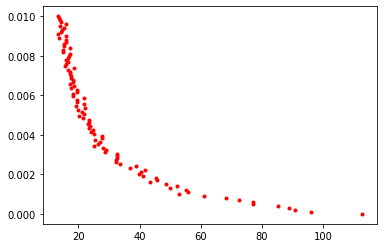

In [9]:
a=np.linspace(0,0.01,100)
E=[sn(1000,100,beta) for beta in a]
plt.plot(E,a,'.',color='red')

x축은 1000개의 입자가 100번 상태변화 시도 후 갖는 평균 에너지,<br>  y축은 $\beta$인데, $\beta = \frac{1}{kT}$ 이므로 +y 방향이 온도가 내려가는 방향, -y 방향이 온도가 올라가는 방향이다.<br>온도가 낮으면(상) 입자의 평균에너지는 낮아지고(좌),<br> 온도가 높으면(하) 입자의 평균에너지가 높아지는(우) 걸 확인할 수 있다.<br><br>볼츠만 분포 그래프는 정확히 어떻게 구현해야될지 몰라서 못 만들었습니다.

입자 박스 (-5)